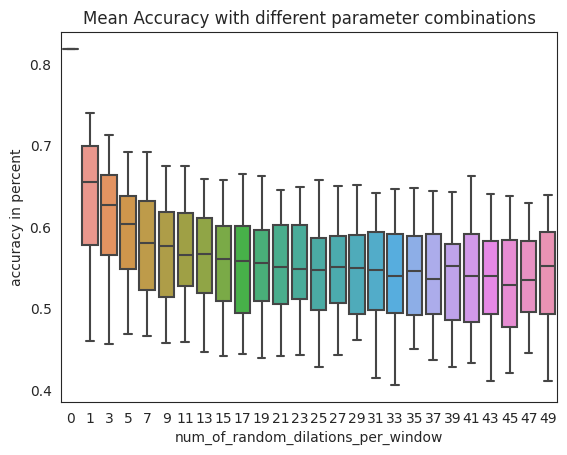

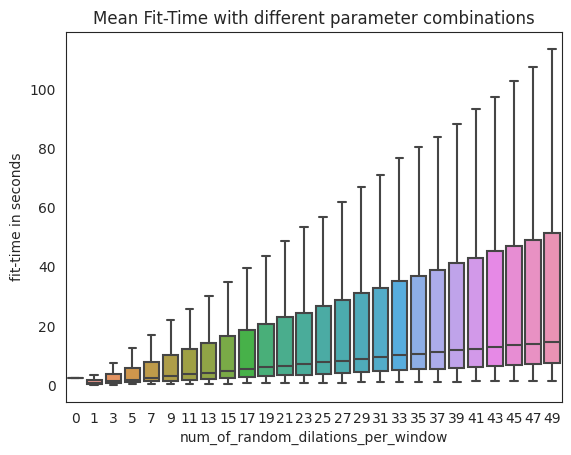

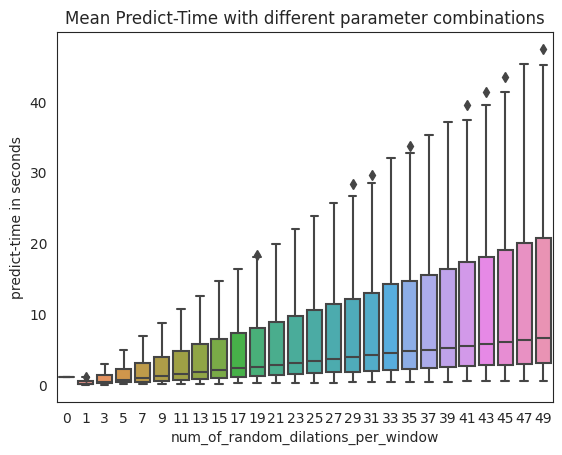

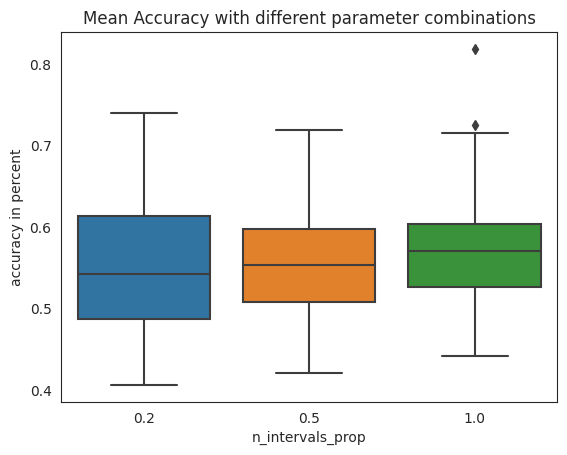

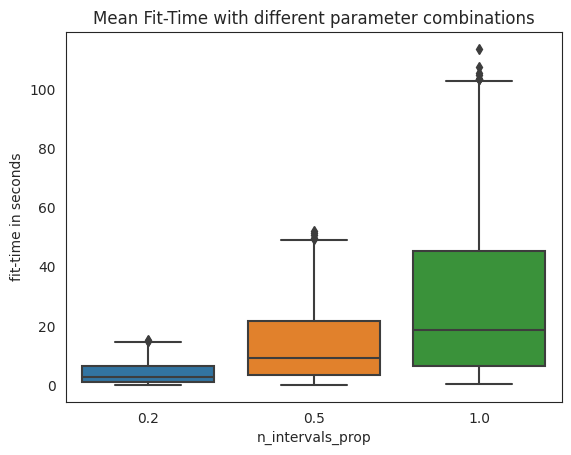

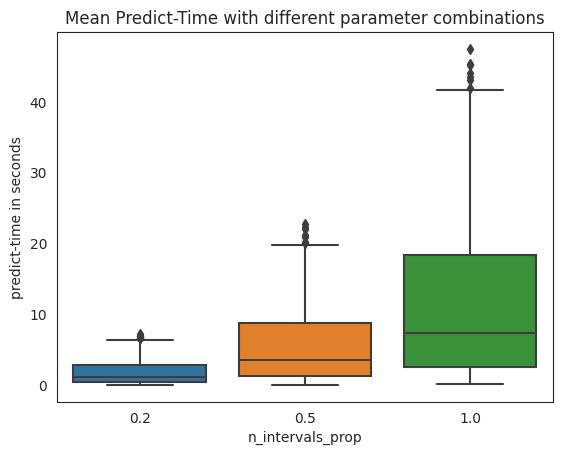

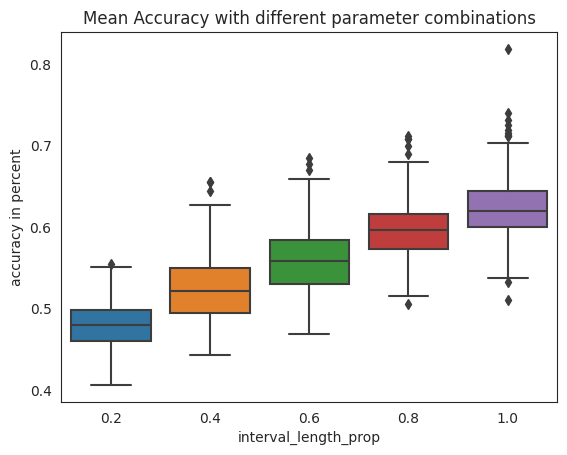

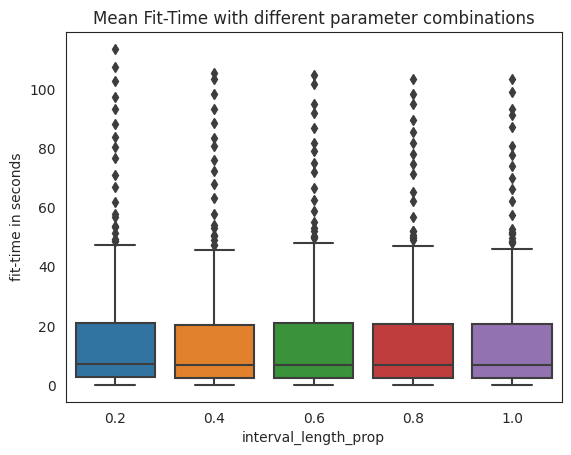

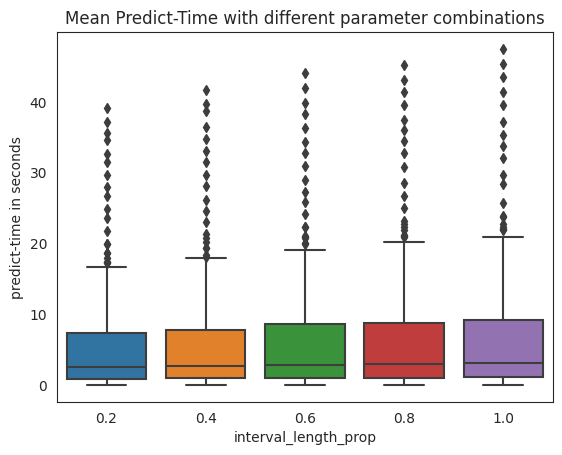

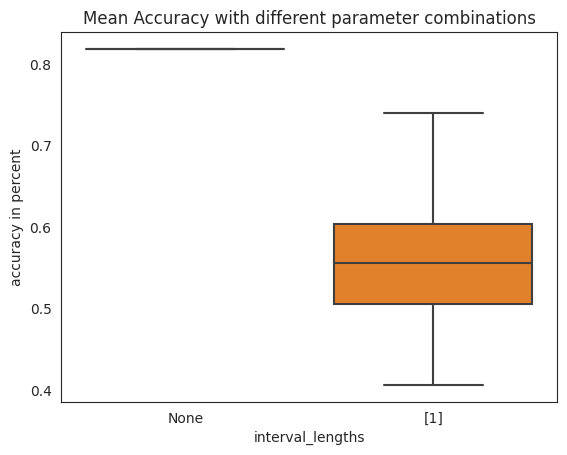

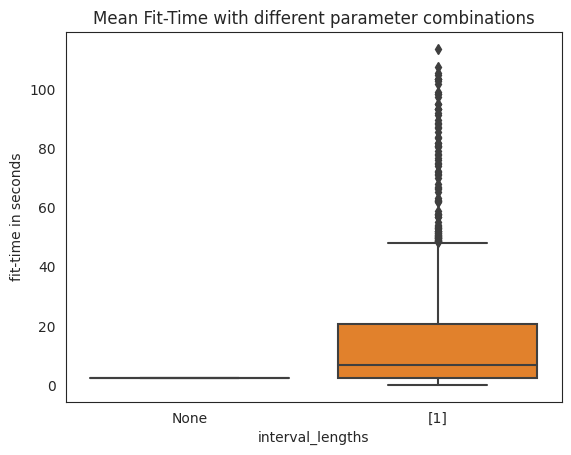

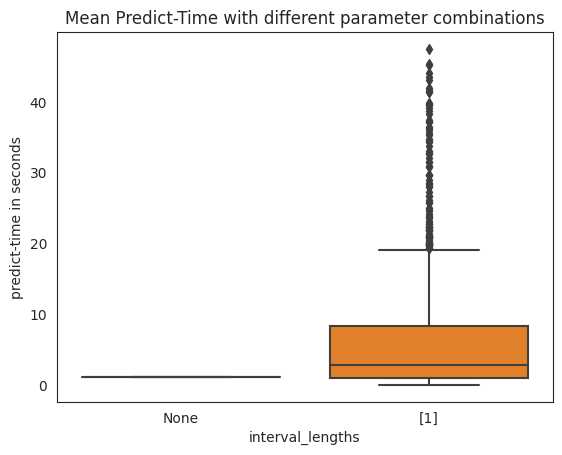

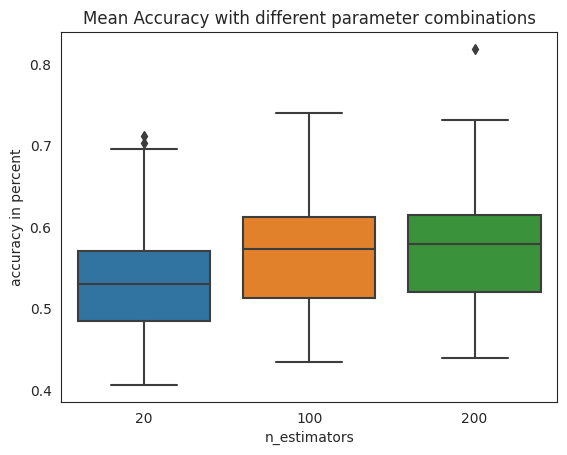

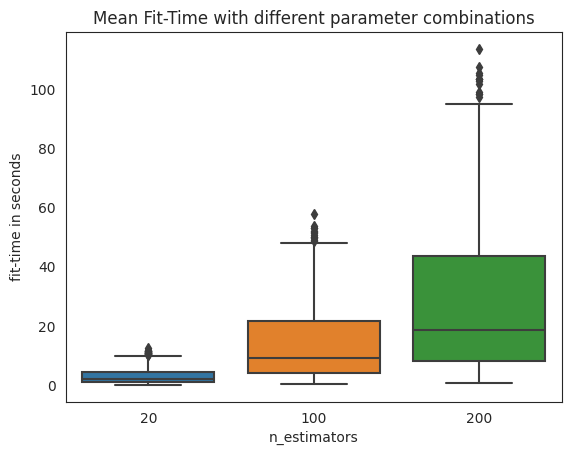

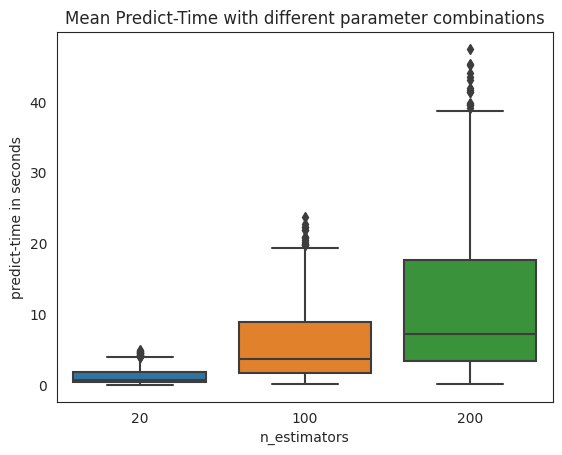

<Figure size 640x480 with 0 Axes>

In [38]:
from typing import List
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("TSF_BULK_WITH_INTERVAL_PROPS_av.csv")

def bulk_visualize(base_column: str):
    df.sort_values(by=[base_column], inplace = True)
    df_grouped = df.groupby(base_column, dropna=False)

    acc_dict = {}
    fit_dict = {}
    predict_dict = {}

    for group_name, df_group in df_grouped:
        boxplot_name = df_group[base_column].iat[0]
        acc_dict[boxplot_name] = df_group['Accuracy']
        fit_dict[boxplot_name] = df_group['Fit-Time']
        predict_dict[boxplot_name] = df_group['Predict-Time']

    acc_dfs = pd.DataFrame(acc_dict)
    sns.set_style('white')
    sns.despine()
    sns.boxplot(data=acc_dfs).set_title('Mean Accuracy with different parameter combinations')
    plt.xlabel(base_column)
    plt.ylabel("accuracy in percent")
    plt.savefig("./" + base_column + "_acc.png")
    plt.show()
    plt.clf()

    fit_dfs = pd.DataFrame(fit_dict)
    sns.boxplot(data=fit_dfs).set_title('Mean Fit-Time with different parameter combinations')
    plt.xlabel(base_column)
    plt.ylabel("fit-time in seconds")
    plt.savefig("./" + base_column + "_fit.png")
    plt.show()
    plt.clf()

    predict_dfs = pd.DataFrame(predict_dict)
    sns.boxplot(data=predict_dfs).set_title('Mean Predict-Time with different parameter combinations')
    plt.xlabel(base_column)
    plt.ylabel("predict-time in seconds")
    plt.savefig("./" + base_column + "_predict.png")
    plt.show()
    plt.clf()

parameters = ["num_of_random_dilations_per_window", "n_intervals_prop",
        "interval_length_prop",
        "interval_lengths",
        "n_estimators",]

for parameter in parameters:
    bulk_visualize(parameter)